# Signal Processing System Design Lab 
# Capstone Project
# "CANNY EDGE DETECTOR"
## Name:Niharika A Raj
## Roll No.:23EE65R05

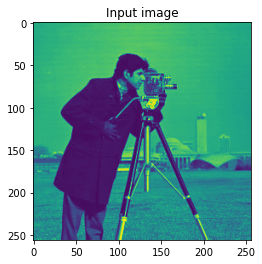

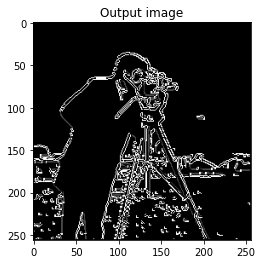

Execution time is: 0.5576160000000527


In [9]:
from scipy import ndimage
from scipy.ndimage.filters import convolve
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

# Define a function for the Canny edge detector
def canny_edge_detector(images, sigma=1, kernel_size=5, weak_pixel=75, strong_pixel=255, low_threshold=0.05, high_threshold=0.15):
    # Initialize a list to store the final edge-detected images
    imgs_final = []

    # Iterate through each input image
    for i, img in enumerate(images):    
        # Apply Gaussian smoothing to reduce noise
        img_smoothed = convolve(img, gaussian_kernel(kernel_size, sigma))

        # Calculate gradients and their directions using Sobel filters
        gradientMat, thetaMat = sobel_filters(img_smoothed)

        # Perform non-maximum suppression to thin edges
        nonMaxImg = non_max_suppression(gradientMat, thetaMat)

        # Apply double thresholding to identify strong and weak edges
        thresholdImg = threshold(nonMaxImg, low_threshold, high_threshold)

        # Apply hysteresis to connect strong edges and suppress weak edges
        img_final = hysteresis(thresholdImg, weak_pixel, strong_pixel)

        # Store the resulting image in the list
        imgs_final.append(img_final)

    # Return the list of edge-detected images
    return imgs_final
    
# Define a function to create a Gaussian kernel for smoothing
def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]

    # Calculate the 2D Gaussian function
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0 * sigma**2))) * normal
    return g

# Define a function to apply Sobel filters for gradient calculation
def sobel_filters(img):
    # Define the Sobel kernels for horizontal and vertical gradients
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)

    # Convolve the image with the Sobel kernels to calculate the gradients
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)

    # Compute the gradient magnitude and orientation
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    return (G, theta)

# Define a function for non-maximum suppression
def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M, N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            try:
                q = 255
                r = 255

                # Determine the neighboring pixels for gradient comparison
                if (0 <= angle[i, j] < 22.5) or (157.5 <= angle[i, j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                elif (22.5 <= angle[i, j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                elif (67.5 <= angle[i, j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                elif (112.5 <= angle[i, j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                # Perform non-maximum suppression
                if (img[i, j] >= q) and (img[i, j] >= r):
                    Z[i, j] = img[i, j]
                else:
                    Z[i, j] = 0

            except IndexError as e:
                pass

    return Z

# Define a function for double thresholding
def threshold(img, low_threshold, high_threshold):
    highThreshold = img.max() * high_threshold
    lowThreshold = highThreshold * low_threshold

    M, N = img.shape
    res = np.zeros((M, N), dtype=np.int32)

    weak = np.int32(75)
    strong = np.int32(255)

    # Identify strong and weak edge pixels based on thresholds
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

    # Assign pixel values to create the edge map
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    return res

# Define a function for hysteresis to connect strong edges and suppress weak edges
def hysteresis(img, weak_pixel, strong_pixel):
    M, N = img.shape
    weak = weak_pixel
    strong = strong_pixel

    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img[i, j] == weak):
                try:
                    # Check neighboring pixels to connect strong edges
                    if ((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong)
                        or (img[i, j-1] == strong) or (img[i, j+1] == strong)
                        or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
                        img[i, j] = strong
                    else:
                        img[i, j] = 0
                except IndexError as e:
                    pass

    return img

# Load the input image
input_image = cv2.imread('C:\\Users\\Niharika\\Desktop\\NOTES\\KGP\\cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Create a list of input images
images = [input_image]


sigma = 10
kernel_size = 3
low_threshold = 50
high_threshold =150

# Apply Canny edge detection
start=time.perf_counter()
output_images = canny_edge_detector(images, sigma, kernel_size, low_threshold, high_threshold)
end=time.perf_counter()

plt.imshow(input_image)
plt.title("Input image")
plt.show()

# Display the resulting edge-detected image(s)

for i, output_image in enumerate(output_images):
    plt.figure()
    plt.imshow(output_image, cmap='gray')
    plt.title(f'Output image')
    plt.show()
#Calculate execution time
exe=end-start
print("Execution time is:",exe)
